In [1]:
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np

%matplotlib inline

# Mandelbrot

In [2]:
def mandelbrot(x_min, x_max, y_min, y_max, img_width=16, img_height=14, maxiter=100, exp=2, threshold=4.0, dpi=72, show_axis=False):
    width = img_width * dpi
    height = img_height * dpi    

    r = np.linspace(x_min, x_max, width, dtype=np.float32)
    i = np.linspace(y_min, y_max, height, dtype=np.float32)
    c = r[np.newaxis, :] + i[:, np.newaxis]*1j

    output = np.zeros(c.shape)
    z = np.zeros(c.shape, dtype=np.complex64)

    for it in range(maxiter):
        notdone = z.real**exp + z.imag**exp < threshold
        output[notdone] = it
        z[notdone] = z[notdone]**exp + c[notdone]

    output[output == maxiter-1] = 0

    fig, ax = plt.subplots(figsize=(img_width, img_height), dpi=dpi)

    if show_axis:
        ticks = np.arange(0, width, dpi)
        x_ticks = x_min + (x_max - x_min) * ticks / width
        plt.xticks(ticks, x_ticks)

        ticks = np.arange(0, height, dpi)
        y_ticks = y_min + (y_max - y_min) * ticks / height
        plt.yticks(ticks, y_ticks)
    else:
        plt.axis('off')

    ax.imshow(output, cmap='gnuplot2', origin='lower', norm=colors.PowerNorm(0.3))

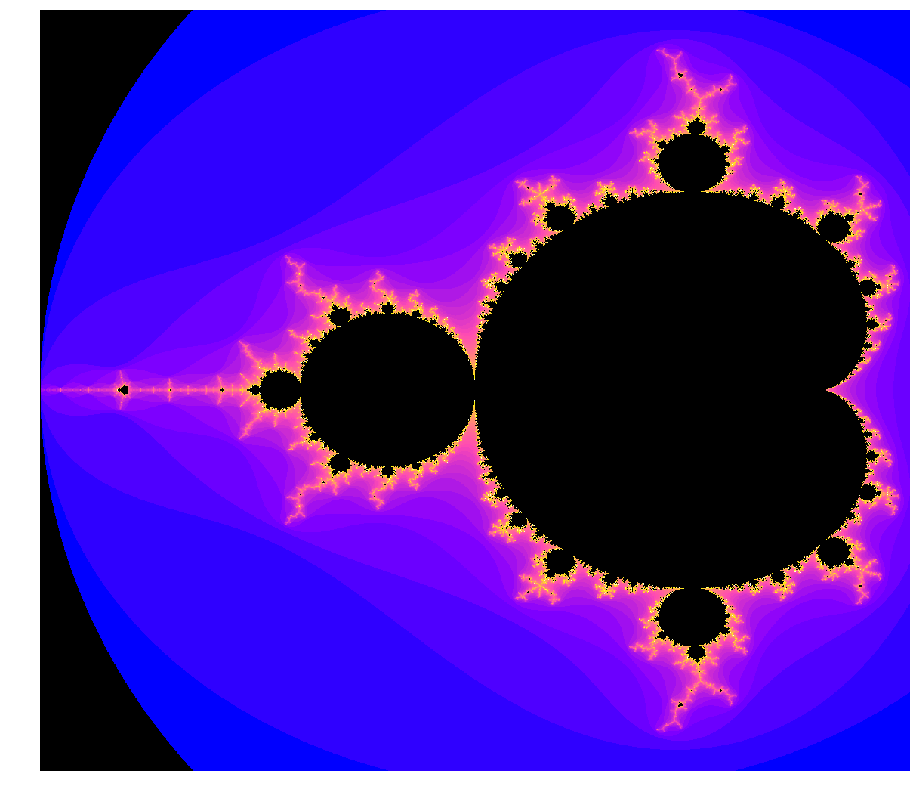

In [3]:
mandelbrot(-2.0, 0.5, -1.25, 1.25)

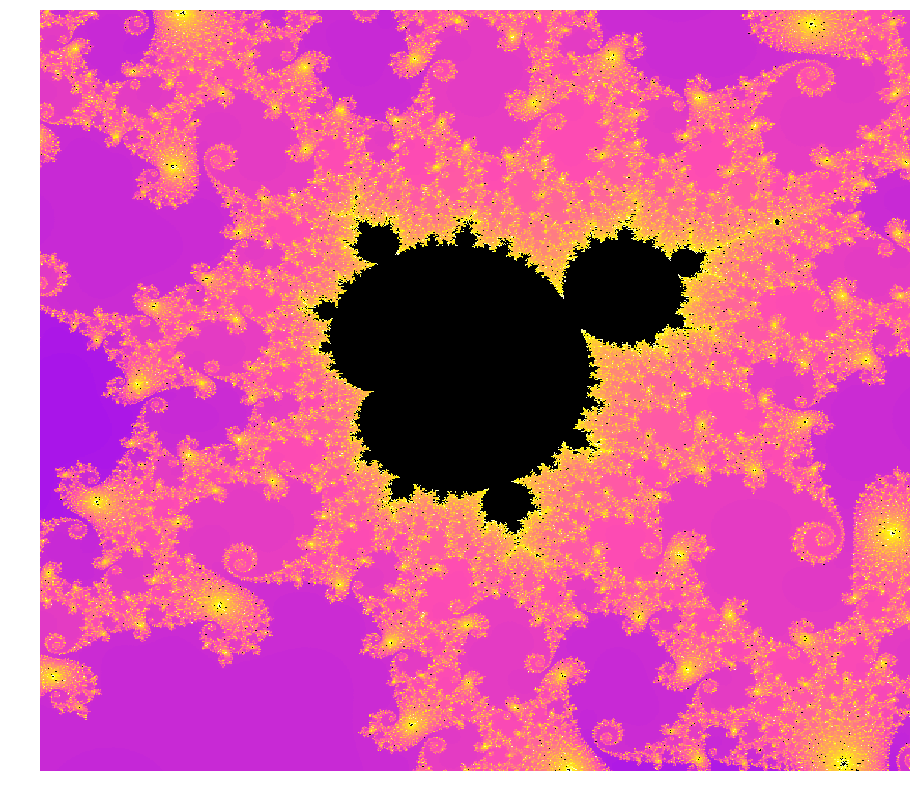

In [4]:
mandelbrot(-0.74877, -0.74872, 0.06505, 0.06510, maxiter=2048)

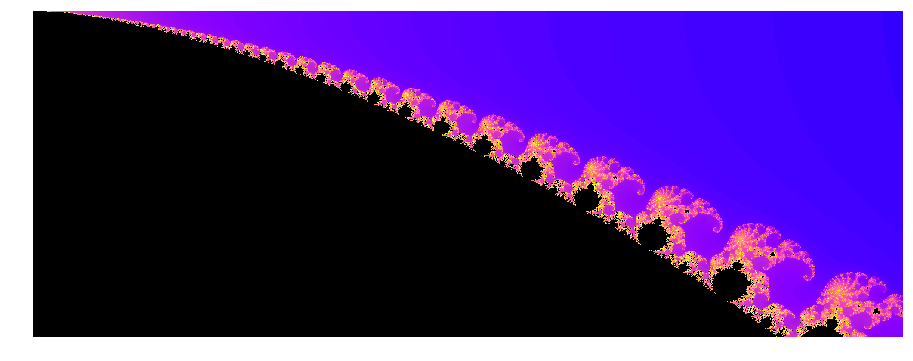

In [5]:
mandelbrot(0.25, 0.3, -0.02, 0.0, img_height=6, maxiter=512)

https://www.youtube.com/watch?v=Ujvy-DEA-UM

https://www.youtube.com/watch?v=TTpbP5BVtiA

# L-systems

In [6]:
import turtle
import tkinter as tk


def generate(initial_axiom, rules, maxiter=9):
    axiom = initial_axiom
    for _ in range(maxiter):
        axiom = ''.join(rules[c] if c in rules else c for c in axiom)
    return axiom


def draw(axiom, step=10, angle=60, initial_position=(0, 0), initial_angle=90, speed=0, width=1920, height=1080):
    """Iterate over axiom drawind it according to following rules:

    `F`, `A` = move step forward
    `G` = move step forward without drawing a line
    `B` = move step backwards
    `-` = turn left by angle
    `+` = turn right by angle
    `[` = push position and angle
    `]` = pop position and angle
    `a` = change color to brown 1
    `b` = change color to brown 2
    `c` = change color to green
    `d` = change color to white
    `1..9` line size (std = 1)
    """
    stack  = []                   # For tracking turtle positions

    root = tk.Tk()
    cv = turtle.ScrolledCanvas(root)
    cv.pack(expand=True, fill='both')

    screen = turtle.TurtleScreen(cv)
#     screen = turtle.Screen()
    screen.colormode(255)
    screen.screensize(width, height)
    screen.onkey(turtle.bye, 'q')
    screen.listen()

    try:
        marker = turtle.RawTurtle(screen)
        marker.hideturtle()
        marker.speed(speed)
        marker.left(initial_angle)

        marker.penup()
        marker.goto(initial_position)
        marker.pendown()

        for c in axiom:

            if c == 'F' or c == 'A':
                marker.forward(step)

            elif c == 'G':
                marker.penup()
                marker.forward(step)
                marker.pendown()

            elif c == 'B':
                marker.backward(step)

            elif c == '+':
                marker.left(angle)

            elif c == '-':
                marker.right(angle)

            elif c == '[':
                stack.append((marker.heading(), marker.pos()))

            elif c == ']':
                heading, position = stack.pop()
                marker.penup()
                marker.goto(position)
                marker.setheading(heading)
                marker.pendown()

            elif c == 'a':
                marker.pencolor(105, 46, 26)    # brown 1

            elif c == 'b':
                marker.pencolor(201, 146, 127)  # brown 2

            elif c == 'c':
                marker.pencolor(101, 250, 52)   # green

            elif c == 'd':
                marker.pencolor(255, 255, 255)  # white

            elif c.isdigit():
                marker.pensize(int(c))

        turtle.mainloop()
    except turtle.Terminator:
        pass
    finally:
        root.destroy()

## Sierpinsky

In [ ]:
rules = {'A': '+F-A-F+', 'F': '-A+F+A-'}
axiom = 'A'
tree = generate(axiom, rules, maxiter=8)
draw(tree, angle=60, initial_angle=120, initial_position=(320, -520))

## Koch

In [ ]:
rules = {'F': 'F+F--F+F'}
axiom = 'F'
tree = generate(axiom, rules, maxiter=5)
draw(tree, angle=60, initial_angle=0, width=2400, initial_position=(-1200,-520))

## Dragon curve

In [ ]:
rules = {'X': 'X+YF+', 'Y': '-FX-Y'}
axiom = 'FX'
tree = generate(axiom, rules, maxiter=11)
draw(tree, angle=90)

## Wheat

In [ ]:
rules = {'X': 'F-[[X]-1X]+2F-[+3FX]+1X', 'F': 'X'}
axiom = 'X'
tree = generate(axiom, rules, maxiter=9)
draw(tree, angle=25)

## Tree

In [9]:
rules = {'F': 'a2FF-[c1-F+F+F]+[c1+F-F-F]'}
axiom = 'F'
tree = generate(axiom, rules, maxiter=9)
draw(tree, angle=23)

# Perlin noise

In [7]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import gray
from bokeh.layouts import layout

output_notebook()

Loading BokehJS ...

In [8]:
WIDTH = 512
HEIGHT = 512

In [9]:
def generate_gradient(width=WIDTH, height=HEIGHT, dim=2, seed=None):
    if not seed:
        np.random.seed(seed)

    gradient = np.random.rand(width, height, dim) * 2 - 1
    norm = np.linalg.norm(gradient, axis=2)
    return gradient / norm[:, :, np.newaxis]

In [10]:
def perlin_noise(size_x, size_y, gradient, frequency):
    # linear space by frequency
    x = np.tile(np.linspace(0, frequency, size_x, endpoint=False), size_y)
    y = np.repeat(np.linspace(0, frequency, size_y, endpoint=False), size_x)
    print(x)
    # gradient coordinates
    x0 = x.astype(int)
    y0 = y.astype(int)

    # local coordinate
    x -= x0
    y -= y0

    # gradient projections
    g00 = gradient[x0, y0]
    g10 = gradient[x0 + 1, y0]
    g01 = gradient[x0, y0 + 1]
    g11 = gradient[x0 + 1, y0 + 1]

    # fade
    t = (3 - 2 * x) * x * x

    # linear interpolation
    r = g00[:, 0] * x + g00[:, 1] * y
    s = g10[:, 0] * (x - 1) + g10[:, 1] * y
    g0 = r + t * (s - r)

    # linear interpolation
    r = g01[:, 0] * x + g01[:, 1] * (y - 1)
    s = g11[:, 0] * (x - 1) + g11[:, 1] * (y - 1)
    g1 = r + t * (s - r)

    # fade
    t = (3 - 2 * y) * y * y

    # (bi)linear interpolation
    g = g0 + t * (g1 - g0)

    # reshape
    return g.reshape(size_y, size_x)

In [11]:
def banded_perlin_noise(size_x, size_y, gradient, frequencies, amplitudes):
    image = np.zeros((size_y, size_x))

    for f, a in zip(frequencies, amplitudes):
        image += perlin_noise(size_x, size_y, gradient, f) * a

    image -= image.min()
    image /= image.max()

    return image

In [12]:
g1 = generate_gradient()

In [13]:
plots = []

for frequency in [1, 2, 4, 8, 16, 32, 64, 128]:
    image = perlin_noise(200, 200, g1, frequency)
    
    plot = figure(x_range=(0, 1), y_range=(0, 1), plot_width=200, plot_height=200)
    plot.axis.visible = False
    plot.toolbar_location = None
    plot.min_border = 0
    plot.image([image], x=0, y=0, dw=1, dh=1, palette=gray(256))
    
    plots.append(plot)

show(layout([plots[:4], plots[4:]]))

[0.    0.005 0.01  ... 0.985 0.99  0.995]
[0.   0.01 0.02 ... 1.97 1.98 1.99]
[0.   0.02 0.04 ... 3.94 3.96 3.98]
[0.   0.04 0.08 ... 7.88 7.92 7.96]
[ 0.    0.08  0.16 ... 15.76 15.84 15.92]
[ 0.    0.16  0.32 ... 31.52 31.68 31.84]
[ 0.    0.32  0.64 ... 63.04 63.36 63.68]
[  0.     0.64   1.28 ... 126.08 126.72 127.36]


In [14]:
g2 = generate_gradient(39320)

In [15]:
image = banded_perlin_noise(WIDTH, HEIGHT, g2, [2, 4, 8, 16, 32, 64], [32, 16, 8, 4, 2, 1])

[0.         0.00390625 0.0078125  ... 1.98828125 1.9921875  1.99609375]
[0.        0.0078125 0.015625  ... 3.9765625 3.984375  3.9921875]
[0.       0.015625 0.03125  ... 7.953125 7.96875  7.984375]
[ 0.       0.03125  0.0625  ... 15.90625 15.9375  15.96875]
[ 0.      0.0625  0.125  ... 31.8125 31.875  31.9375]
[ 0.     0.125  0.25  ... 63.625 63.75  63.875]


In [16]:
start = np.array([0x42, 0x92, 0xc6])
end = np.array([0xf7, 0xfb, 0xff])
palette = [
    "#%02x%02x%02x" % tuple(((1 - i) * start + i * end).astype(int))
    for i in np.linspace(0, 1, num=256)
]

In [17]:
plot = figure(x_range=(0, 1), y_range=(0, 1), plot_width=WIDTH, plot_height=HEIGHT)

plot.axis.visible = False
plot.toolbar_location = None
plot.min_border = 0
plot.image([image], x=0, y=0, dw=1, dh=1, palette=palette)

show(plot)

https://www.youtube.com/watch?v=IKB1hWWedMk

https://medium.com/@yvanscher/playing-with-perlin-noise-generating-realistic-archipelagos-b59f004d8401

# Procedural Generation

## No Man's Sky

Świat gry generowany proceduralnie

https://www.youtube.com/watch?v=AFISmcAigfY

https://galacticatlas.nomanssky.com/



## Wave Function Collapse

Repozytorium + przykłady

https://github.com/mxgmn/WaveFunctionCollapse

Interaktywna aplikacja webowa

http://www.kchapelier.com/wfc-example/overlapping-model.html


## Generowanie krajobrazu

Miasto (Pixel City)

https://www.youtube.com/watch?v=-d2-PtK4F6Y

Ziemia (Outerra)

https://www.youtube.com/watch?v=DlKz6r1uCfw